In [31]:
import pandas as pd
import numpy as np
from tools import *
import os
import preprocessor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#Ejemplo de smote con cv
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [32]:
df = pd.read_csv('data/final_dataframe.csv')

In [33]:
df=df.drop('Unnamed: 0',axis=1)

## SPLIT

In [34]:
columns_to_transform=[]
for i in df.columns:
    if df[i].dtype!='int64':
        df[i]=df[i].astype(int)

In [35]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

# Cargar tus datos
# data = tu_dataframe

# Separar las características y la variable objetivo
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sobremuestreo de la clase minoritaria
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Calcular la nueva distribución de clases después del sobremuestreo
class_distribution = Counter(y_train_resampled)
major_class = max(class_distribution, key=class_distribution.get)
reduced_major_class_count = int(class_distribution[major_class] * 0.75)

# Crear un diccionario para la estrategia de submuestreo
sampling_strategy = {major_class: reduced_major_class_count}

# Submuestreo de la clase mayoritaria
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_resampled, y_train_resampled)

print(f"Distribución de clases después del submuestreo: {Counter(y_train_balanced)}")


Distribución de clases después del submuestreo: Counter({0: 23550, 1: 23550, 2: 17662})


## RandomForestClassifier

In [36]:
#Random forest grid search
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV

rf_clf = RandomForestClassifier(random_state=42)

n_estimators = [10,50,100,150,200]
max_features = ['auto', 'sqrt']
max_depth = [20, 25, 28, 30]
min_samples_split = [10,20,25,30]
min_samples_leaf = [6,10,15,20]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_random = RandomizedSearchCV(estimator=rf_clf,
                               param_distributions = random_grid,
                               n_iter=15, cv = 10, verbose=2,
                               random_state=42, n_jobs=12, scoring='roc_auc_ovr')

rf_random.fit(X_train, y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\mario\.co

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=12,
                   param_distributions={'max_depth': [20, 25, 28, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 10, 15, 20],
                                        'min_samples_split': [10, 20, 25, 30],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   random_state=42, scoring='roc_auc_ovr', verbose=2)

In [37]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=20, min_samples_split=30,
                       n_estimators=150, random_state=42)

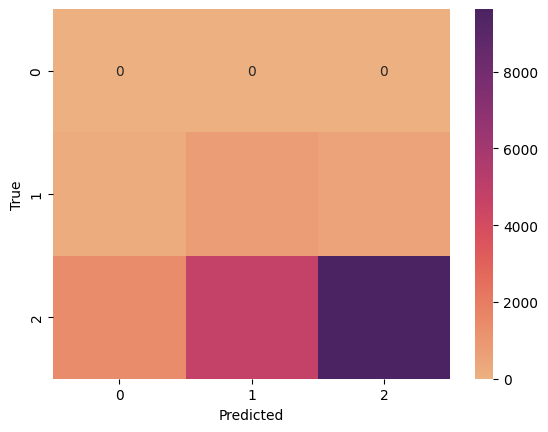

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.13      0.49      0.20      1377
           2       0.95      0.61      0.74     15777

    accuracy                           0.60     17154
   macro avg       0.36      0.37      0.31     17154
weighted avg       0.88      0.60      0.70     17154



c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


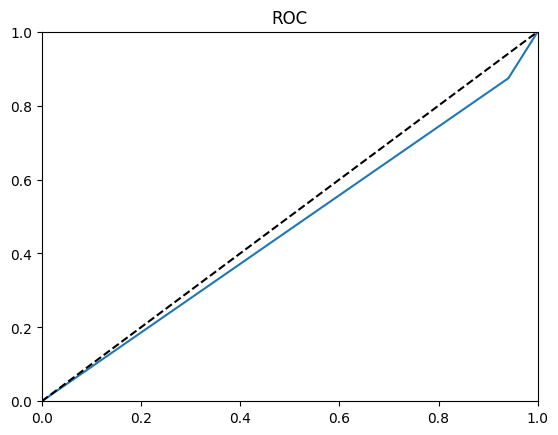

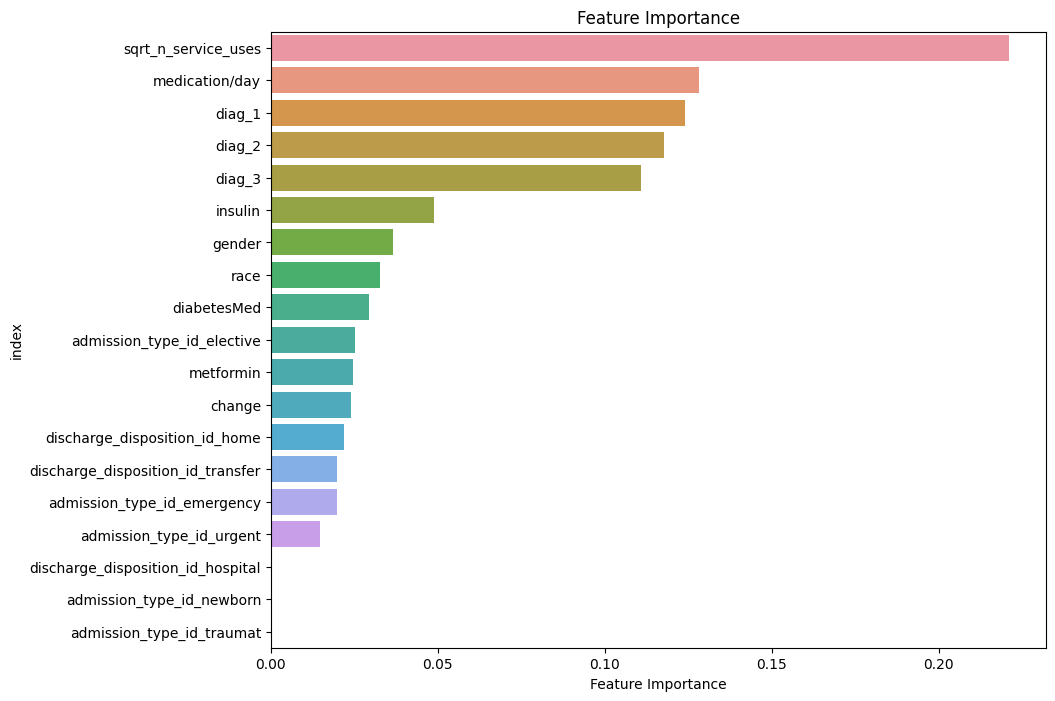

In [39]:
clf = rf_random.best_estimator_
y_pred = clf.predict(X_test)
ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap="flare")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
plt.show()

print(classification_report(y_pred,y_test))

roc = roc_curve(y_test, y_pred, pos_label=1)
sns.lineplot(x=roc[0], y=roc[1])
sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("ROC")
plt.show()

imp_df = pd.DataFrame(data=clf.feature_importances_, columns=['Feature Importance'],
                      index=X.columns)

imp_df.sort_values("Feature Importance", ascending=False, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(y='index', x='Feature Importance', data=imp_df.reset_index())
plt.title("Feature Importance")
plt.show()

In [40]:
#Random forest grid search
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV

lgbm_model = lgb.LGBMClassifier(random_state=42)

n_estimators = [10,50,100,150,200]
max_depth = [20, 25, 28, 30]
min_samples_split = [10,20,25,30]
min_samples_leaf = [6,10,15,20]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_random = RandomizedSearchCV(estimator=lgbm_model,
                               param_distributions = random_grid,
                               n_iter=15, cv = 10, verbose=2,
                               random_state=42, n_jobs=12, scoring='roc_auc_ovr')

rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the ove

RandomizedSearchCV(cv=10, estimator=LGBMClassifier(random_state=42), n_iter=15,
                   n_jobs=12,
                   param_distributions={'max_depth': [20, 25, 28, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 10, 15, 20],
                                        'min_samples_split': [10, 20, 25, 30],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   random_state=42, scoring='roc_auc_ovr', verbose=2)

In [42]:
rf_random.best_estimator_


LGBMClassifier(max_depth=25, max_features='auto', min_samples_leaf=20,
               min_samples_split=25, n_estimators=50, random_state=42)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


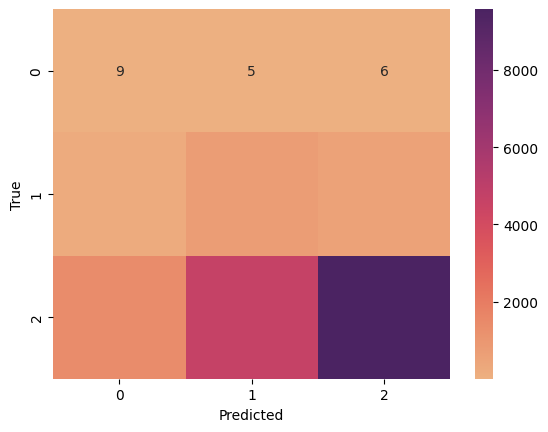

              precision    recall  f1-score   support

           0       0.01      0.45      0.01        20
           1       0.14      0.50      0.22      1502
           2       0.94      0.61      0.74     15632

    accuracy                           0.60     17154
   macro avg       0.36      0.52      0.32     17154
weighted avg       0.87      0.60      0.70     17154



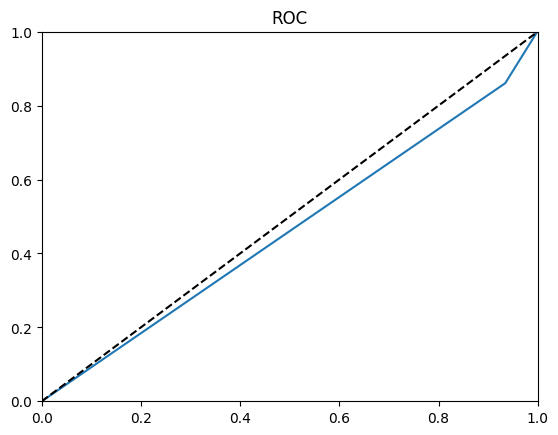

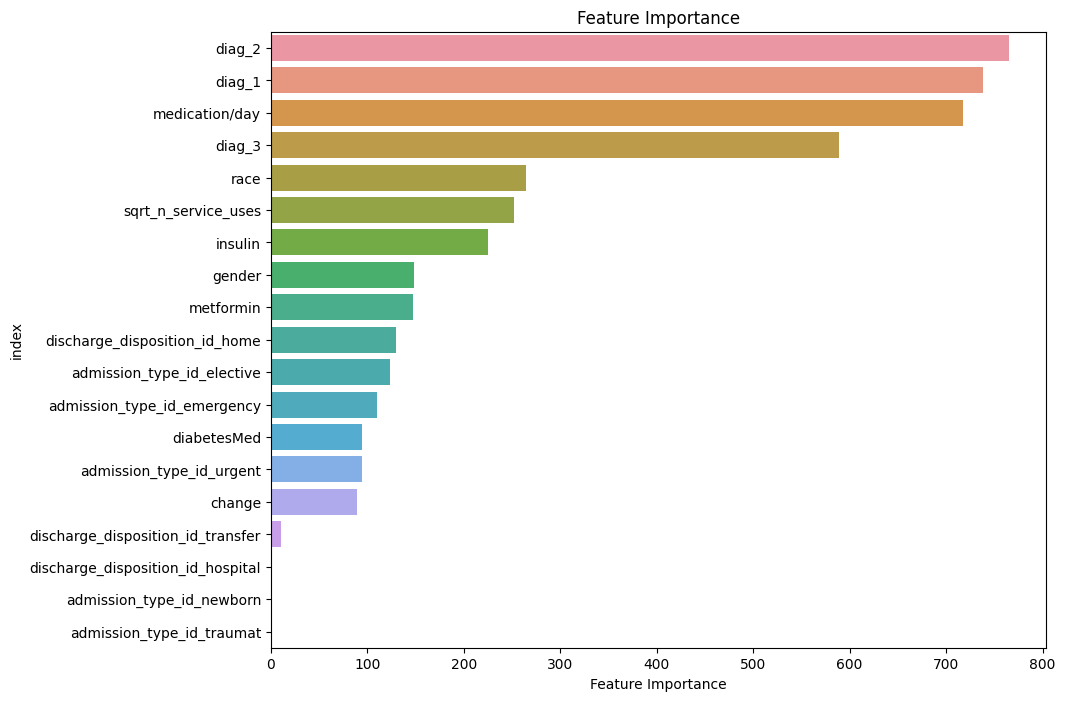

In [41]:
clf = rf_random.best_estimator_
y_pred = clf.predict(X_test)
ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap="flare")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
plt.show()

print(classification_report(y_pred,y_test))

roc = roc_curve(y_test, y_pred, pos_label=1)
sns.lineplot(x=roc[0], y=roc[1])
sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("ROC")
plt.show()

imp_df = pd.DataFrame(data=clf.feature_importances_, columns=['Feature Importance'],
                      index=X.columns)

imp_df.sort_values("Feature Importance", ascending=False, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(y='index', x='Feature Importance', data=imp_df.reset_index())
plt.title("Feature Importance")
plt.show()